<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/FIN_Y_FTC_Casa_de_Bolsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

Saving Valor de la Unidad.xlsx to Valor de la Unidad.xlsx


# **Cargar datos**

In [3]:
FIN = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FIN")

In [4]:
FTC = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FTC")

In [5]:
FIN['Fecha'] = pd.to_datetime(FIN['Fecha'])
FTC['Fecha'] = pd.to_datetime(FTC['Fecha'])

In [6]:
FIN.set_index('Fecha', inplace=True)
FTC.set_index('Fecha', inplace=True)

In [7]:
FIN.head()

,Valor Fondo,Valor Unidad,Unidades en Circulación,Rendimientos,Comisión Fija,Comisión Exito,Retención,Factor Retenc.,Rentab Diaria,Rentab Bruta,Rent Mes Eje Izq,Suscrip tores,Total Aperturas,Total Adiciones,Total Retiros,Imp. Retiros,Total Cancel,Imp. Cancel,Total NC,Total ND
Fecha,,,,,,,,,,,,,,,,,,,,
2023-04-27,4.075393e+07,1000.00,40753.93,0.00,0.00,0,0,0,0.00,0.00,0.0,1,40753930,0.000000e+00,0.0,0,0,0,0,0
2023-04-28,2.081243e+10,988.22,21060439.60,-479922.23,390.11,0,0,0,-0.99,-0.99,0.0,1,0,2.077216e+10,0.0,0,0,0,0,0
2023-04-29,2.082169e+10,988.66,21060439.60,9256151.44,199223.76,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-04-30,2.083098e+10,989.10,21060439.60,9298926.12,199312.36,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-05-01,2.084028e+10,989.55,21060439.60,9297320.57,199401.38,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0


In [8]:
FTC.head()

,Valor Fondo,Valor Unidad,Unidades en Circulación,Rendimientos,Comisión Fija,Comisión Exito,Retención,Factor Retenc.,Rentab Diaria,Rentab Bruta,Rent Mes Eje Izq,Suscrip tores,Total Aperturas,Total Adiciones,Total Retiros,Imp. Retiros,Total Cancel,Imp. Cancel,Total NC,Total ND
Fecha,,,,,,,,,,,,,,,,,,,,
2023-04-27,2.833568e+07,1000.00,28335.69,0.00,0.00,0,0,0,0.00,0.00,0.0,1,28335685,0.000000e+00,0.0,0,0,0,0,0
2023-04-28,1.403352e+10,988.22,14200745.04,-333683.78,271.24,0,0,0,-0.99,-0.99,0.0,1,0,1.400551e+10,0.0,0,0,0,0,0
2023-04-29,1.403921e+10,988.62,14200745.04,5690237.51,134333.66,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-04-30,1.404491e+10,989.03,14200745.04,5703307.11,134388.12,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-05-01,1.405061e+10,989.43,14200745.04,5698349.59,134442.72,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0


Text(0.5, 0, 'Fecha')

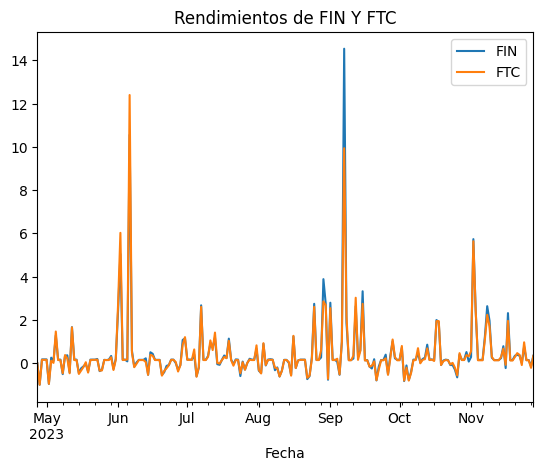

In [9]:
FIN['Rentab Diaria'].plot()
FTC['Rentab Diaria'].plot()
plt.title('Rendimientos de FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')  # Rango de fechas mensuales
plt.legend(['FIN',"FTC"])
plt.xlabel('Fecha')

In [10]:
descripcion_RENDIMIENTOSFIN = FIN['Rentab Diaria'].describe()
descripcion_RENDIMIENTOSFIN

count    216.000000
mean       0.449861
std        1.490233
min       -0.990000
25%       -0.040000
50%        0.160000
75%        0.340000
max       14.540000
Name: Rentab Diaria, dtype: float64

In [11]:
descripcion_RENDIMIENTOSFTC = FTC['Rentab Diaria'].describe()
descripcion_RENDIMIENTOSFTC

count    217.000000
mean       0.426590
std        1.376274
min       -0.990000
25%       -0.010000
50%        0.150000
75%        0.300000
max       12.400000
Name: Rentab Diaria, dtype: float64

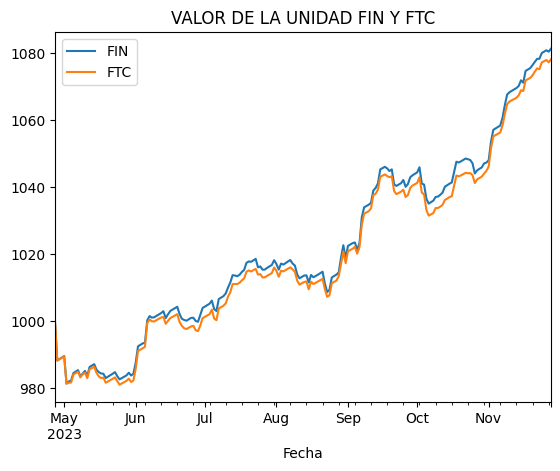

In [12]:
FIN["Valor Unidad"].plot()
FTC["Valor Unidad"].plot()
plt.title('VALOR DE LA UNIDAD FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')
plt.legend(['FIN',"FTC"])

In [13]:
descripcion_VUFIN = FIN['Valor Unidad'].describe()
descripcion_VUFIN

count     216.000000
mean     1021.872639
std        27.095229
min       981.340000
25%      1001.747500
50%      1016.330000
75%      1042.355000
max      1081.360000
Name: Valor Unidad, dtype: float64

In [14]:
descripcion_VUFTC = FTC['Valor Unidad'].describe()
descripcion_VUFTC

count     217.000000
mean     1019.614608
std        26.468495
min       980.990000
25%      1000.080000
50%      1013.930000
75%      1039.320000
max      1078.160000
Name: Valor Unidad, dtype: float64

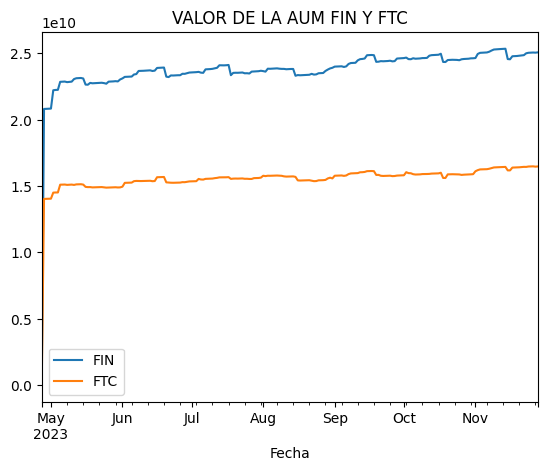

In [15]:
FIN['Valor Fondo'].plot()
FTC['Valor Fondo'].plot()
plt.title('VALOR DE LA AUM FIN Y FTC')
plt.legend(['FIN',"FTC"])

In [16]:
FIN['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

Fecha
2023-11-24    25,046,945,362,49
2023-11-25    25,056,594,249,82
2023-11-26    25,066,260,102,15
2023-11-27    25,056,277,585,41
2023-11-28    25,076,991,746,74
Name: Valor Fondo, dtype: object

In [17]:
FTC['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

Fecha
2023-11-24    16,475,125,957,60
2023-11-25    16,480,882,596,81
2023-11-26    16,486,648,624,36
2023-11-27    16,464,298,136,94
2023-11-28    16,477,520,136,70
Name: Valor Fondo, dtype: object

In [18]:
nivel_confianza = 0.95

In [19]:
FIN['Valor Unidad'].tail()

Fecha
2023-11-24    1080.06
2023-11-25    1080.48
2023-11-26    1080.90
2023-11-27    1080.47
2023-11-28    1081.36
Name: Valor Unidad, dtype: float64

In [20]:
FIN['Rentab Diaria'].tail()

Fecha
2023-11-24    0.77
2023-11-25    0.15
2023-11-26    0.15
2023-11-27   -0.14
2023-11-28    0.35
Name: Rentab Diaria, dtype: float64

# **Retorno_FTC**

In [21]:
RETORNO_FTC_BASE = FTC['Rendimientos']

In [22]:
Retorno_FTC = FTC['Valor Fondo']*FTC['Rentab Diaria']
Retorno_FTC.head()

Fecha
2023-04-27    0.000000e+00
2023-04-28   -1.389318e+10
2023-04-29    2.246273e+09
2023-04-30    2.247185e+09
2023-05-01    2.248097e+09
dtype: float64

# **Retorno_FIN**

In [23]:
RETORNO_FIN_BASE = FIN['Rendimientos']

In [24]:
Retorno_FIN = FIN['Valor Fondo']*FIN['Rentab Diaria']
Retorno_FIN.head()

Fecha
2023-04-27    0.000000e+00
2023-04-28   -2.060431e+10
2023-04-29    3.747903e+09
2023-04-30    3.749577e+09
2023-05-01    3.751251e+09
dtype: float64

# **VaR FTC**

In [25]:
var_FTC = np.percentile(RETORNO_FTC_BASE, (1 - nivel_confianza) * 100)

In [26]:
var_formatted = "{:,.2f}".format(var_FTC).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -35.198.845,69


In [27]:
historico_var_FTC = []
for p in range(1, 101):
    percentil = np.percentile(Retorno_FTC, p)
    historico_var_FTC.append(percentil)
print(historico_var_FTC)

[-12771271116.735682, -11957466430.814928, -9979398652.62283, -9180048059.512907, -8783414210.02584, -8362117682.225557, -7965886502.783963, -7333031953.577208, -7053775057.163472, -6620470567.7187395, -5575212837.503436, -5090738043.562073, -4897259406.92184, -4650448047.599279, -4193976208.0093613, -3479814040.341688, -3248995517.7695107, -3159344146.1308804, -2631022074.3934083, -2377863466.594598, -1591151876.0470083, -1342865853.317936, -1253046233.255968, -848470223.2665414, -156562468.8375, 46459069.51801707, 311505965.99937606, 523407242.9954497, 866060993.0633031, 939821844.4970399, 1581684816.602195, 1785379738.234081, 2106685566.7403002, 2165619229.022033, 2211223518.06804, 2220559156.164664, 2232695299.56428, 2234422482.3901525, 2235364600.067624, 2246637959.61184, 2254182057.946672, 2267206972.7743797, 2270823447.73434, 2277515037.683032, 2289701624.80012, 2300173737.8504643, 2307535266.670272, 2308473355.1528683, 2314818404.10678, 2332460364.4275, 2335266923.86716, 233771

# **VaR FIN**

In [28]:
var_FIN = np.percentile(RETORNO_FIN_BASE, (1 - nivel_confianza) * 100)

In [29]:
var_formatted = "{:,.2f}".format(var_FIN).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -52.893.877,73


In [30]:
historico_var_FIN = []
for p in range(1, 101):
    percentil = np.percentile(Retorno_FIN, p)
    historico_var_FIN.append(percentil)
print(historico_var_FIN)

[-20017566025.874973, -18730569263.83345, -16601918596.121641, -14293043236.31976, -13821886443.5804, -12601972550.50192, -12542180275.974775, -11259949374.675901, -10353274388.344511, -9602968467.51595, -8351459773.35356, -8055655025.025881, -7127447945.770675, -6814588902.57488, -5924962783.869451, -5325362215.93908, -4900634914.614228, -3969220613.7677436, -3568016711.45175, -3169606637.5204005, -2445334613.8934503, -1961022040.3248, -1916017752.2920399, -1758831234.5842, -947192398.1929, -68329520.92431098, 236956489.22171506, 570670279.0982413, 1229561859.0891712, 1925568344.5168, 2323614470.040482, 3155314720.5866, 3479560667.6579304, 3642648280.1155496, 3660128960.5674, 3669500770.5579, 3719992331.8186502, 3743189751.9014096, 3750999771.5666103, 3759939015.3225, 3767700971.8425603, 3792413491.2638397, 3798398610.852225, 3805777201.37592, 3810716043.9484, 3824803038.9606404, 3830027399.94128, 3846402357.54432, 3869230839.5528655, 3879725467.5602, 3890492746.1368804, 3934083628.07

# **Graficos**

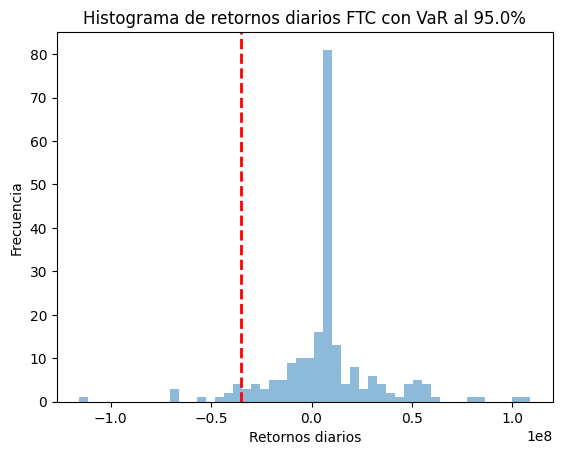

In [31]:
plt.hist(RETORNO_FTC_BASE , bins=50, alpha=0.5)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-32-9583f13e289f>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FTC_BASE, shade=True)


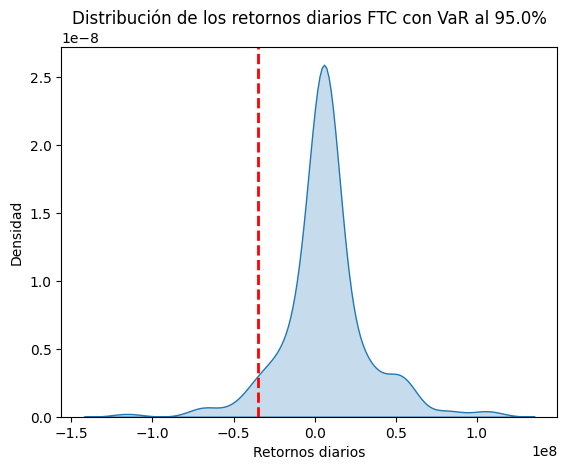

In [32]:
sns.kdeplot(RETORNO_FTC_BASE, shade=True)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

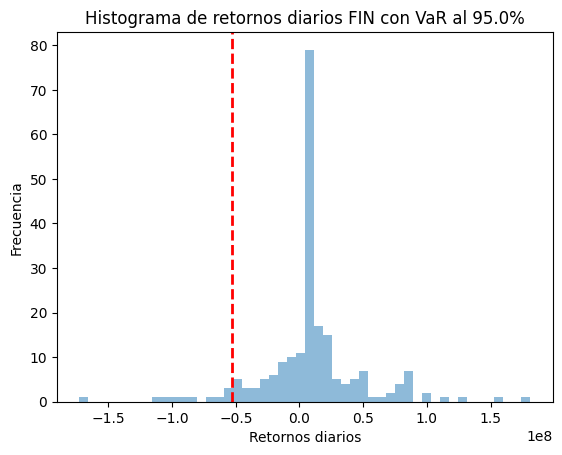

In [33]:
plt.hist(RETORNO_FIN_BASE , bins=50, alpha=0.5)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-34-74d80ddc373e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FIN_BASE, shade=True)


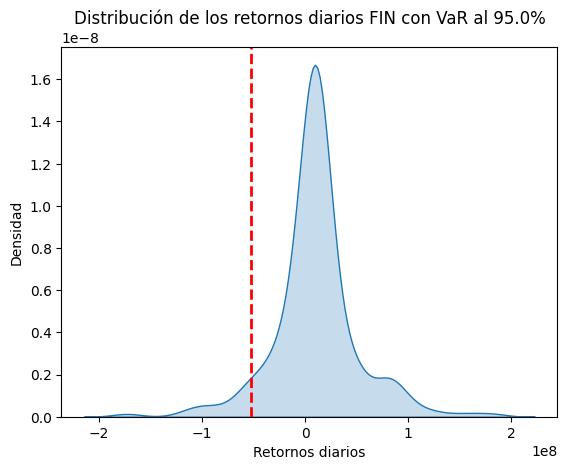

In [34]:
sns.kdeplot(RETORNO_FIN_BASE, shade=True)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

<ipython-input-35-f5b2386f87a6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FTC_BASE, shade=True,label='Retorno FTC')
<ipython-input-35-f5b2386f87a6>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(RETORNO_FIN_BASE, shade=True,label='Retorno FIN')


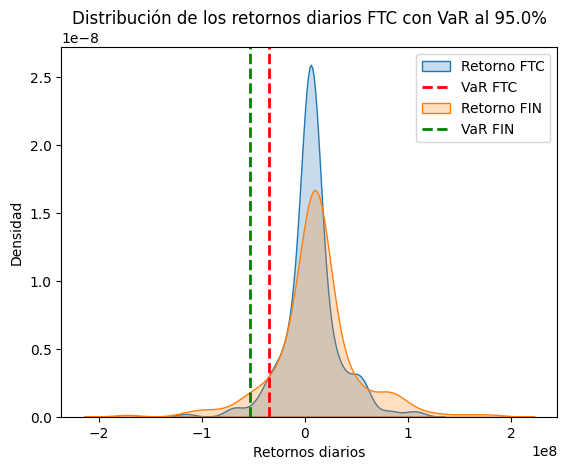

In [35]:
# Gráfico 1 - Retorno_FTC
sns.kdeplot(RETORNO_FTC_BASE, shade=True,label='Retorno FTC')
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2,label='VaR FTC')
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
# Gráfico 2 - Retorno_FIN
sns.kdeplot(RETORNO_FIN_BASE, shade=True,label='Retorno FIN')
plt.axvline(x=var_FIN, color='g', linestyle='--', linewidth=2,label='VaR FIN')
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.legend()
plt.show()

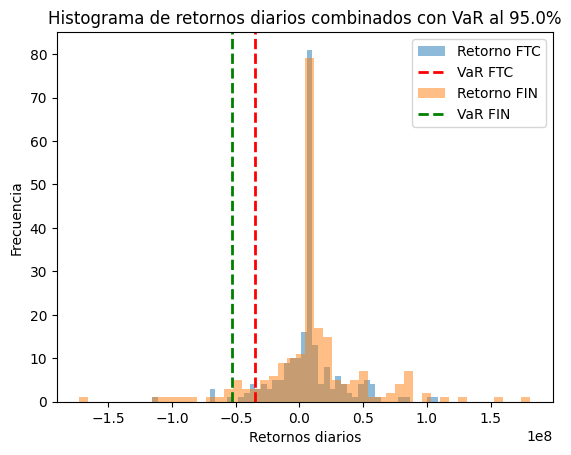

In [36]:
plt.hist(RETORNO_FTC_BASE , bins=50, alpha=0.5,label='Retorno FTC')
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2 ,label='VaR FTC')
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
# Gráfico 2 - Retorno_FIN
plt.hist(RETORNO_FIN_BASE , bins=50, alpha=0.5,label='Retorno FIN')
plt.axvline(x=var_FIN, color='g', linestyle='--', linewidth=2, label='VaR FIN')
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios combinados con VaR al {}%'.format(nivel_confianza * 100))
plt.legend()
# Mostrar los gráficos combinados
plt.show()

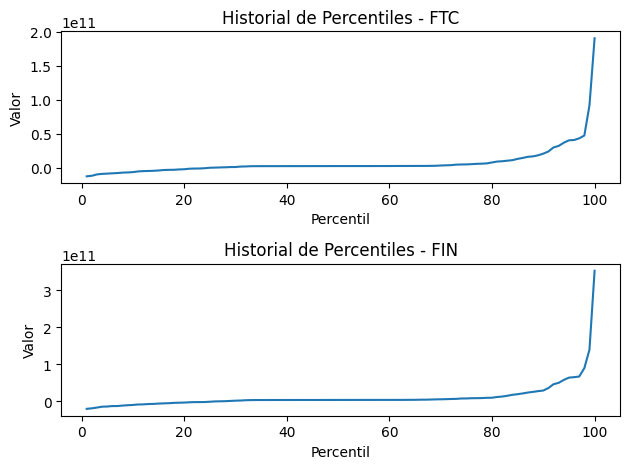

In [37]:
x = np.arange(1, 101)
# Gráfico 1
plt.subplot(2, 1, 1)
plt.plot(x, historico_var_FTC)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Historial de Percentiles - FTC')
# Gráfico 2
plt.subplot(2, 1, 2)
plt.plot(x, historico_var_FIN)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Historial de Percentiles - FIN')
# Ajustar los márgenes para evitar superposiciones de etiquetas
plt.tight_layout()
# Mostrar los gráficos
plt.show()

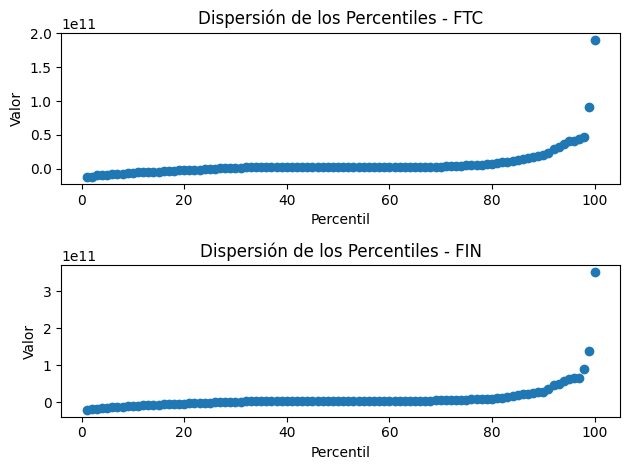

In [38]:
x = range(1, 101)
# Gráfico 1
plt.subplot(2, 1, 1)
plt.scatter(x, historico_var_FTC)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Dispersión de los Percentiles - FTC')
# Gráfico 2
plt.subplot(2, 1, 2)
plt.scatter(x, historico_var_FIN)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Dispersión de los Percentiles - FIN')

# Ajustar los márgenes para evitar superposiciones de etiquetas
plt.tight_layout()

# **Composición Dinamica**

In [39]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

Saving FIN Formato portafolio diario para envío.xlsx to FIN Formato portafolio diario para envío.xlsx


In [ ]:
FIN = pd.read_excel("/content/FIN Formato portafolio diario para envío.xlsx")

In [ ]:
FIN.head()

In [ ]:
Composicion = pd.pivot_table(FIN, values='Valor Presente', index='Fecha', columns='Tasa Indexada', aggfunc=np.sum, margins=True, margins_name='Total') \
    .rename(columns={'NO': 'Acciones', 'No Tiene': 'Liquidez'}) \
    .drop(index=['Total']) \
    .style.format('{:,.2f}'.format)

In [ ]:
Composicion = Composicion.data
Composicion.fillna(0, inplace=True)
corr_matrix=Composicion.corr()

In [ ]:
Composicion_tail=Composicion.tail()

In [ ]:
Composicion_tail.style.format('{:,.2f}'.format)

In [ ]:
colors = ['#1B5E20', '#388E3C', '#4CAF50']
cmap = ListedColormap(colors)
sns.heatmap(corr_matrix,cmap=cmap, annot=True)
plt.show()

In [ ]:
# Calcular la columna de porcentajes
porcentajes = Composicion.div(Composicion.iloc[:,-1], axis=0).iloc[:,:-1]
porcentajes.columns = [str(col) for col in porcentajes.columns]
# Agregar la columna de porcentajes al DataFrame
Composicion= pd.concat([Composicion, porcentajes], axis=0)

In [ ]:
Composicion = Composicion.drop("Total", axis=1)
Composicion.tail()

In [ ]:
# Crear el gráfico de áreas apiladas al 100%
ax = porcentajes.plot(kind='area', stacked=True, figsize=(10, 5), legend=True, ylim=[0, 1], y=['Liquidez','Acciones',"FS","IB1","IPC"])

# Configurar el título y etiquetas de los ejes
ax.set_title('Composición del portafolio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor Presente')

# Mostrar la leyenda del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear el gráfico de áreas apiladas al 100%
ax = porcentajes.plot(kind='barh', stacked=True, figsize=(10, 9), legend=True, ylim=[0, 1], y=['Liquidez','Acciones',"FS","IB1","IPC"])
# Configurar el título y etiquetas de los ejes
ax.set_title('Composición del portafolio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor Presente')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Mostrar la leyenda del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()